# Assignment Decision Tree and Random Forest using Company_Data dataset

In [49]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Importing Python libraries

In [50]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

### Loading and Understanding the dataset

In [51]:
company_raw = pd.read_csv("Company_Data.csv")
company_raw.head(3)
company_raw.tail(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [52]:
company_raw.shape
company_raw.columns
company_raw.dtypes
# there are 400 records and 11 variables
# Sales is the target variable 

(400, 11)

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [53]:
company_raw.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [54]:
company_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [55]:
company_raw.isnull().sum().sum()

company_raw.isnull().sum()
# there are no missing values in our data

# to find which row numbers have missing values
# company.loc[company.isnull().any(axis=1)]

0

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

### Visualizations

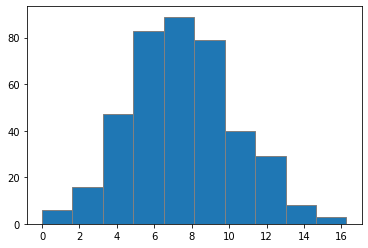

In [56]:
plt.hist(company_raw.Sales, edgecolor='grey');

(array([102., 247.,  51.]),
 array([ 0.        ,  5.42333333, 10.84666667, 16.27      ]),
 <a list of 3 Patch objects>)

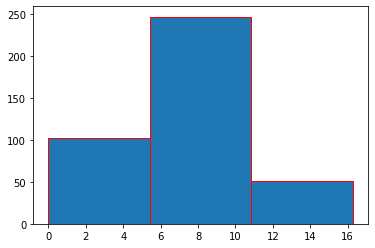

In [57]:
plt.hist(company_raw.Sales, bins=3, edgecolor='red')

(array([241., 159.]),
 array([ 0.   ,  8.135, 16.27 ]),
 <a list of 2 Patch objects>)

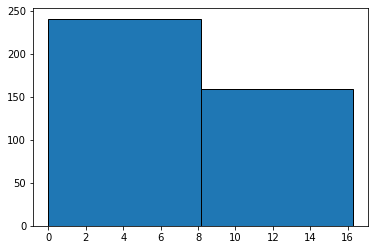

In [58]:
plt.hist(company_raw.Sales, bins=2, edgecolor='black')

In [59]:
# Whether to divide Sales into 2 or 3 groups
# There are 400 records. 
# If we make 2 bins (Sales<=8 and >8), data will be approximately divided into 240 (60%) and 160 (40%) records
# If we make 3 bins (Sales <=5 , 5-11 and >11), data will be approximately divided into 100(25%), 250(63%%), 50 (12%) records

240/400
250/400


0.6

0.625

#### Let us first divide the data into 2 Sales groups 

In [60]:
## dividing the data into 2 bins
category = pd.cut(company_raw.Sales, bins=[-1,8,20], labels=['Low','High'])
company = company_raw.copy()
company['Sales_group'] = category
company.head()

company.drop(company.columns[[0]], axis=1, inplace=True)
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_group
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_group
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [61]:
company.Sales_group.value_counts()
company.Sales_group.value_counts(normalize=True)

Low     236
High    164
Name: Sales_group, dtype: int64

Low     0.59
High    0.41
Name: Sales_group, dtype: float64

In [62]:
## encoding the variable text classes into numbered-values
string_columns = ['ShelveLoc', 'Urban' , 'US' , 'Sales_group']

le = LabelEncoder()
for i in string_columns:
    company[i] = le.fit_transform(company[i])


In [63]:
company.dtypes
# now all variables are converted into numeric datatype

CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int32
Age            int64
Education      int64
Urban          int32
US             int32
Sales_group    int32
dtype: object

In [64]:
company.Sales_group.value_counts(normalize=True)

1    0.59
0    0.41
Name: Sales_group, dtype: float64

In [65]:
company_raw.head()
company.head()
# for Sales-group 0 indicates High and 1 indicates Low Sales

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_group
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


## Splitting the data

In [66]:
cols = company.columns
X = company[cols[0:10]]
y = company[cols[10]]

train, test = train_test_split(company, stratify=y, test_size=0.3, random_state=123)

In [67]:
company.Sales_group.value_counts(normalize=True)
train.Sales_group.value_counts(normalize=True)
test.Sales_group.value_counts(normalize=True)
# similar proportion of Sales_group (y) in original, train and test data

1    0.59
0    0.41
Name: Sales_group, dtype: float64

1    0.589286
0    0.410714
Name: Sales_group, dtype: float64

1    0.591667
0    0.408333
Name: Sales_group, dtype: float64

## Model Building

### Model Decision Tree

In [68]:
model_dt1 = DecisionTreeClassifier(criterion='entropy', random_state=123)
model_dt1.fit(train[cols[0:10]], train.Sales_group)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

#### Training accuracy

In [69]:
pred_train = model_dt1.predict(train[cols[0:10]])
pd.crosstab(train.Sales_group, pred_train)
metrics.accuracy_score(train.Sales_group, pred_train)
print(metrics.classification_report(train.Sales_group, pred_train))

col_0,0,1
Sales_group,,
0,115,0
1,0,165


1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       165

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



#### Testing accuracy

In [70]:
pred_test = model_dt1.predict(test[cols[0:10]])
metrics.accuracy_score(test.Sales_group, pred_test)

pd.crosstab(test.Sales_group, pred_test)

print(metrics.classification_report(test.Sales_group, pred_test))

0.7833333333333333

col_0,0,1
Sales_group,,
0,33,16
1,10,61


              precision    recall  f1-score   support

           0       0.77      0.67      0.72        49
           1       0.79      0.86      0.82        71

    accuracy                           0.78       120
   macro avg       0.78      0.77      0.77       120
weighted avg       0.78      0.78      0.78       120



### Pruning of Decision Tree

In [71]:
model_dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=1000,  random_state=123)
model_dt2.fit(train[cols[0:10]], train.Sales_group)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1000, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [72]:
# Training accuracy
pred_train = model_dt2.predict(train[cols[0:10]])
pd.crosstab(train.Sales_group, pred_train)
metrics.accuracy_score(train.Sales_group, pred_train)
print(metrics.classification_report(train.Sales_group, pred_train))

col_0,0,1
Sales_group,,
0,115,0
1,0,165


1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       165

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



In [73]:
# Testing accuracy
pred_test = model_dt2.predict(test[cols[0:10]])
metrics.accuracy_score(test.Sales_group, pred_test)

pd.crosstab(test.Sales_group, pred_test)

print(metrics.classification_report(test.Sales_group, pred_test))

0.7833333333333333

col_0,0,1
Sales_group,,
0,33,16
1,10,61


              precision    recall  f1-score   support

           0       0.77      0.67      0.72        49
           1       0.79      0.86      0.82        71

    accuracy                           0.78       120
   macro avg       0.78      0.77      0.77       120
weighted avg       0.78      0.78      0.78       120



In [74]:
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_group
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


### Modelling using Random Forest 

In [75]:
model_rf1 = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=200, criterion='entropy', random_state=123)
model_rf1.fit(train[cols[0:10]], train.Sales_group)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
                       oob_score=True, random_state=123, verbose=0,
                       warm_start=False)

In [76]:
model_rf1.oob_score_
# for n_estimators=500, it is 82.14%
# # for n_estimators=1000, it is 79.64%

0.8071428571428572

In [77]:
pred_train = model_rf1.predict(train[cols[0:10]])
pd.crosstab(train.Sales_group, pred_train)
metrics.accuracy_score(train.Sales_group, pred_train)
print(metrics.classification_report(train.Sales_group, pred_train))
# 100% accuracy. All Sales <8 (low sales, group 1) have been correctly predicted
# All Sales >=8 (high sales, group 0) have been correctly predicted

col_0,0,1
Sales_group,,
0,115,0
1,0,165


1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       165

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



In [78]:
pred_test = model_rf1.predict(test[cols[0:10]])
metrics.accuracy_score(test.Sales_group, pred_test)

pd.crosstab(test.Sales_group, pred_test)

print(metrics.classification_report(test.Sales_group, pred_test))

# when n_estimators=500, 
# test accuracy is 80% while train accuracy was 100%. This is an overfitting model
# The accuracy of High sales (0) is 71% and that of Low sales (1) is 86%

# when n_estimators=1000, 
# test accuracy is 80% while train accuracy was 100%. This is an overfitting model
# The accuracy of High sales (0) is 71% and that of Low sales (1) is 86%

0.8166666666666667

col_0,0,1
Sales_group,,
0,35,14
1,8,63


              precision    recall  f1-score   support

           0       0.81      0.71      0.76        49
           1       0.82      0.89      0.85        71

    accuracy                           0.82       120
   macro avg       0.82      0.80      0.81       120
weighted avg       0.82      0.82      0.81       120



### Finding Solution for Overfitting problem

In [79]:
model_rf_new = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=1000, criterion='entropy', random_state=123, max_depth=30, max_features=4, min_samples_leaf=5)
model_rf_new.fit(train[cols[0:10]], train.Sales_group)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=30, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=2, oob_score=True, random_state=123, verbose=0,
                       warm_start=False)

In [80]:
model_rf_new.oob_score_
# it is 81.79%


0.8178571428571428

In [81]:
pred_train = model_rf_new.predict(train[cols[0:10]])
pd.crosstab(train.Sales_group, pred_train)
metrics.accuracy_score(train.Sales_group, pred_train)
print(metrics.classification_report(train.Sales_group, pred_train))

# In almost all models , training accuracy was 100%. In this model it is reduced to 95%. recall rate is 94% and 96% .

col_0,0,1
Sales_group,,
0,108,7
1,6,159


0.9535714285714286

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       115
           1       0.96      0.96      0.96       165

    accuracy                           0.95       280
   macro avg       0.95      0.95      0.95       280
weighted avg       0.95      0.95      0.95       280



In [82]:
pred_test = model_rf_new.predict(test[cols[0:10]])
metrics.accuracy_score(test.Sales_group, pred_test)

pd.crosstab(test.Sales_group, pred_test)

print(metrics.classification_report(test.Sales_group, pred_test))

# overall test accuracy is 80% . Recall rate is 69% and 87%
# By trying various combinations, we can further reduce the overfitting problem


0.7916666666666666

col_0,0,1
Sales_group,,
0,31,18
1,7,64


              precision    recall  f1-score   support

           0       0.82      0.63      0.71        49
           1       0.78      0.90      0.84        71

    accuracy                           0.79       120
   macro avg       0.80      0.77      0.77       120
weighted avg       0.79      0.79      0.79       120



### Data Processing using 3 Sales groups

(array([102., 247.,  51.]),
 array([ 0.        ,  5.42333333, 10.84666667, 16.27      ]),
 <a list of 3 Patch objects>)

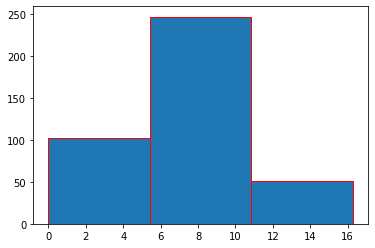

In [83]:
plt.hist(company_raw.Sales, bins=3, edgecolor='red')

In [84]:
category1 = pd.cut(company_raw.Sales, bins=[-1, 6, 10, 20], labels=['Less','Medium','More'])
company1 = company_raw.copy()
company1['Sales_group'] = category1
company1.head()

company1.drop(company1.columns[[0]], axis=1, inplace=True)
company1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_group
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,More
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,More
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Less


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_group
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,More
2,113,35,10,269,80,Medium,59,12,Yes,Yes,More
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Less


In [85]:
company1.Sales_group.value_counts()
company1.Sales_group.value_counts(normalize=True)

Medium    192
Less      130
More       78
Name: Sales_group, dtype: int64

Medium    0.480
Less      0.325
More      0.195
Name: Sales_group, dtype: float64

In [86]:
## encoding the variable text classes into numbered-values
string_columns = ['ShelveLoc', 'Urban' , 'US' , 'Sales_group']

le = LabelEncoder()
for i in string_columns:
    company1[i] = le.fit_transform(company1[i])


In [87]:
company1.dtypes
# now all variables are converted into numeric datatype

CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int32
Age            int64
Education      int64
Urban          int32
US             int32
Sales_group    int32
dtype: object

In [88]:
company_raw.head()
company1.head()
# Sales_group classes:  0 is Less, 1 is Medium and 2 is More

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_group
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,2
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,0


### Splitting the data

In [89]:
cols = company1.columns

y = company1[cols[10]]
y

0      1
1      2
2      2
3      1
4      0
      ..
395    2
396    1
397    1
398    0
399    1
Name: Sales_group, Length: 400, dtype: int32

In [90]:
train1, test1 = train_test_split(company1, stratify=y,test_size=0.20, random_state=123)

In [91]:
company1.Sales_group.value_counts(normalize=True)
train1.Sales_group.value_counts(normalize=True)
test1.Sales_group.value_counts(normalize=True)

1    0.480
0    0.325
2    0.195
Name: Sales_group, dtype: float64

1    0.48125
0    0.32500
2    0.19375
Name: Sales_group, dtype: float64

1    0.475
0    0.325
2    0.200
Name: Sales_group, dtype: float64

### Decision Tree Model for 3 Sales group

In [92]:
model_dt3 = DecisionTreeClassifier(criterion='entropy', random_state=123)
model_dt3.fit(train1[cols[0:10]], train1.Sales_group)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [93]:
pred_train1 = model_dt3.predict(train1[cols[0:10]])
pd.crosstab(train1.Sales_group, pred_train1)
print(metrics.classification_report(train1.Sales_group, pred_train1))

col_0,0,1,2
Sales_group,,,
0,104,0,0
1,0,154,0
2,0,0,62


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       154
           2       1.00      1.00      1.00        62

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [94]:
pred_test1 = model_dt3.predict(test1[cols[0:10]])
pd.crosstab(test1.Sales_group, pred_test1)
print(metrics.classification_report(test1.Sales_group, pred_test1))

col_0,0,1,2
Sales_group,,,
0,16,10,0
1,5,28,5
2,0,9,7


              precision    recall  f1-score   support

           0       0.76      0.62      0.68        26
           1       0.60      0.74      0.66        38
           2       0.58      0.44      0.50        16

    accuracy                           0.64        80
   macro avg       0.65      0.60      0.61        80
weighted avg       0.65      0.64      0.63        80



### Random Forest Model for 3 Sales-groups

In [95]:
train1, test1 = train_test_split(company1, stratify=y,test_size=0.30, random_state=123)

In [96]:
model_rf2 = RandomForestClassifier(n_jobs=2, oob_score=True, criterion='entropy',n_estimators=500, random_state=123)
model_rf2.fit(train1[cols[0:10]], train1.Sales_group)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=True, random_state=123, verbose=0,
                       warm_start=False)

In [97]:
model_rf2.oob_score_
# 61.07%

0.6107142857142858

In [98]:
pred_train1 = model_rf2.predict(train1[cols[0:10]])
pd.crosstab(train1.Sales_group, pred_train1)
print(metrics.classification_report(train1.Sales_group, pred_train1))
# training accuracy is 100%. Recall rate for all classes is also 100% i.e., records in all 3 classes have been correctly 
# predicted

col_0,0,1,2
Sales_group,,,
0,91,0,0
1,0,134,0
2,0,0,55


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       134
           2       1.00      1.00      1.00        55

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



In [100]:
pred_test1 = model_rf2.predict(test1[cols[0:10]])
pd.crosstab(test1.Sales_group, pred_test1)
print(metrics.classification_report(test1.Sales_group, pred_test1))
# Overall testing accuracy is 68% as compared to 100% of training accuracy. The recall rate is about 67%, 83% and 30%
# for the 3 classes.
# Decision tree classifier for 3 sales-groups had better result.


col_0,0,1,2
Sales_group,,,
0,26,13,0
1,5,48,5
2,0,16,7


              precision    recall  f1-score   support

           0       0.84      0.67      0.74        39
           1       0.62      0.83      0.71        58
           2       0.58      0.30      0.40        23

    accuracy                           0.68       120
   macro avg       0.68      0.60      0.62       120
weighted avg       0.69      0.68      0.66       120



### Important Measures in Decision Tree classification

#### GINI INDEX

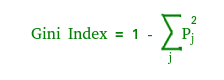

In [101]:
# GINI values
# if in a binary class variable, each class is equally divided
1 - (np.square(0.5) + np.square(0.5))
# 0.5


# if sample is fully homogeneous
1 - (np.square(1) + np.square(0))
# 0

# for the classic iris Species, there are 3 classes and each has 50 records
50/150  
1 - (np.square(0.333) + np.square(0.333) + np.square(0.333))
# 0.667333

0.5

0

0.3333333333333333

0.667333

In [102]:
# Calculating GINI INDICES for different classes of Sales
b =company_raw.loc[company_raw.Sales<7]
b.shape[0] 
p = b.shape[0] / company_raw.shape[0]
p

gini = (1 - (np.square(p) + np.square(1-p)))
gini

184

0.46

0.4967999999999999

In [103]:
# finding prob of each class in 2 classes-Sales-group
company.Sales_group.value_counts(normalize=True)

# prob of 'Low' is 0.59 , 
p = 0.59

# finiding gini
gini_2SalesGroups = (1 - (np.square(p) + np.square(1-p)))

print('Gini Index when we have 2 classes of Sales is:',gini_2SalesGroups)

1    0.59
0    0.41
Name: Sales_group, dtype: float64

Gini Index when we have 2 classes of Sales is: 0.4838


In [104]:
# finding prob of each class in 3 classes-Sales-group
company1.Sales_group.value_counts(normalize=True)

# prob  
p1 = 0.480
p2 = 0.325
p3 = 0.195

# finding gini
gini_3SalesGroups = (1 - (np.square(p1) + np.square(p2) + np.square(p3)))

print('Gini Index when we have 3 classes of Sales is:',gini_3SalesGroups)

1    0.480
0    0.325
2    0.195
Name: Sales_group, dtype: float64

Gini Index when we have 3 classes of Sales is: 0.62595


#### ENTROPY

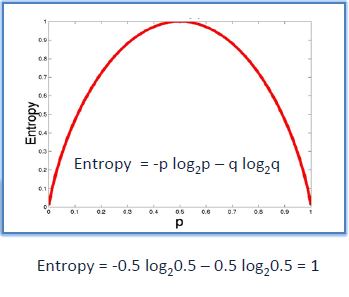

In [105]:
import math
# math.log(value, base)
# OR np.log2(value)

# finding prob of each class in 2 classes-Sales-group
company.Sales_group.value_counts(normalize=True)

# prob of 'Low' is 0.59 , 
p = 0.59

# finding entropy
# [ P(class1)*log(P(class1),2) + P(class2)*log(P(class2),2) + … + P(classN)*log(P(classN),2)]
entropy_2SalesGroups = -(p*math.log(p,2)) - ((1-p)*math.log((1-p),2))

print('Entropy when we have 2 classes of Sales is:',entropy_2SalesGroups)
# Entropy when we have 2 classes of Sales is: 0.9765004687578241

1    0.59
0    0.41
Name: Sales_group, dtype: float64

Entropy when we have 2 classes of Sales is: 0.9765004687578241


In [106]:
# finding prob of each class in 3 classes-Sales-group
company1.Sales_group.value_counts(normalize=True)

# prob 
p1 = 0.480
p2 = 0.325
p3 = 0.195

# finding entropy
# [ P(class1)*log(P(class1),2) + P(class2)*log(P(class2),2) + … + P(classN)*log(P(classN),2)]
entropy_3SalesGroups = -(p1*math.log(p1,2)) -(p2*math.log(p2,2)) -(p3*np.log2(p3))

print('Entropy when we have 3 classes of Sales is:',entropy_3SalesGroups)
# Entropy when we have 3 classes of Sales is: 1.4951512175161836

1    0.480
0    0.325
2    0.195
Name: Sales_group, dtype: float64

Entropy when we have 3 classes of Sales is: 1.4951512175161836


In [107]:
# when we have 2 classes, max entropy is 1
class2 = - 0.5*np.log2(0.5)
class2
class2 *2

# when we have 3 classes, max entropy is 1.59
class3 = -(0.333*math.log(0.333,2))
class3
class3 * 3

# when we have 4 classes, max entropy is 2
class4 = - 0.25*np.log2(0.25)
class4
class4*4

0.5

1.0

0.5282731705577447

1.584819511673234

0.5

2.0

### Conclusions